# Credit Card Fraud Detection

## Contents

* [Introduction](#section1)
* [Importing libraries and files](#section2)
* [EDA](#section3)
 * [First look at the data](#section3.1)
 * [Description of features](#section3.2)
 * [Balance of class](#section3.3)
 * [Distribution of features](#section3.4)
 * skewdness
 * kurtosis

* Preprocessing
* Models
* Feature Importance
* Conclusion


<a id='section1'></a>
## Introduction
 * Link to Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud
 * 

<a id='section2'></a>
## Importing libraries and files


In [32]:

import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
import seaborn as sns


In [4]:
data = pd.read_csv('creditcard.csv')


<a id='section3'></a>
## EDA
Description of the data:
* shape
* data types
* Description of features
* balance of class
* Distribution of amount by target
* Distribution of amount by time? fraudulent transact close together?
* Distribution of v1-28 by target and maybe by binned amount
* skewdness
* kurtosis


<a id='section3.1'></a>
### First look at the data


In [6]:
print('Shape of the data:\n{}'.format(data.shape))

print('\nData types:\n{}'.format(pd.unique(data.dtypes)))

print('\nNumber of missing values in the data:\n{}'.format(data.isna().sum().sum()))

Shape of the data:
(284807, 31)

Data types:
[dtype('float64') dtype('int64')]

Number of missing values in the data:
0


In [15]:
pd.DataFrame.round(data.describe(), decimals=3)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,...,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,...,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,...,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,...,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,...,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


<a id='section3.2'></a>
### Description of features

Time 
- Number of seconds elapsed between this transaction and the first transaction in the dataset.

Amount
- Transaction Amount.

Class
- 1 for fraudulent transaction, 0 for non-fraudulent transaction.

V1 - V28
- Numerical input variables which are the principal components obtained with PCA transformation.


<a id='section3.3'></a>
### Balance of class


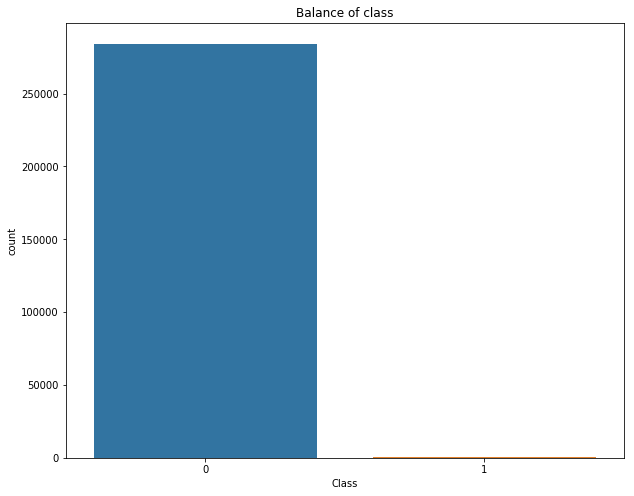

Number of fraudulent transactions in the data:
492
0.00173% of the transactions are fraudulent


In [108]:
fig = plt.figure(figsize=(10, 8))
plt.title('Balance of class')
ax = sns.countplot(x=data.Class)
plt.show()

print('Number of fraudulent transactions in the data:\n{}'.format(data['Class'].loc[data['Class'] == 1].count()))
print('{}% of the transactions are fraudulent'
      .format(round(data['Class'].loc[data['Class'] == 1].count()/data['Class'].count(), 5)))


The data set is highly unbalanced with 492 cases of fraud out of 284,807 transactions.
Besides the necessity of stratified sampling, Tom Fawcett recommends in his blog a number of steps which can be 
to handle the imbalance of classes.* The publishers of the data set recommend using
the area under the Precision-Recall Curve (AUPRC) as a measurement of accuracy.

*Source: https://www.svds.com/learning-imbalanced-classes


<a id='section3.4'></a>
### Distribution of features
